[*********************100%%**********************]  1 of 1 completed
C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 72s 21ms/step - loss: 0.0020
Epoch 2/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - loss: 2.2040e-04
Epoch 3/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 1.1479e-04
Epoch 4/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 62s 21ms/step - loss: 7.2493e-05
Epoch 5/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - loss: 6.4213e-05
Epoch 6/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 68s 23ms/step - loss: 5.6724e-05
Epoch 7/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - loss: 5.2349e-05
Epoch 8/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 67s 23ms/step - loss: 4.3948e-05
Epoch 9/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - loss: 5.4326e-05
Epoch 10/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step - loss: 4.3120e-05
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


ValueError: x and y must have same first dimension, but have shapes (799,) and (738,)

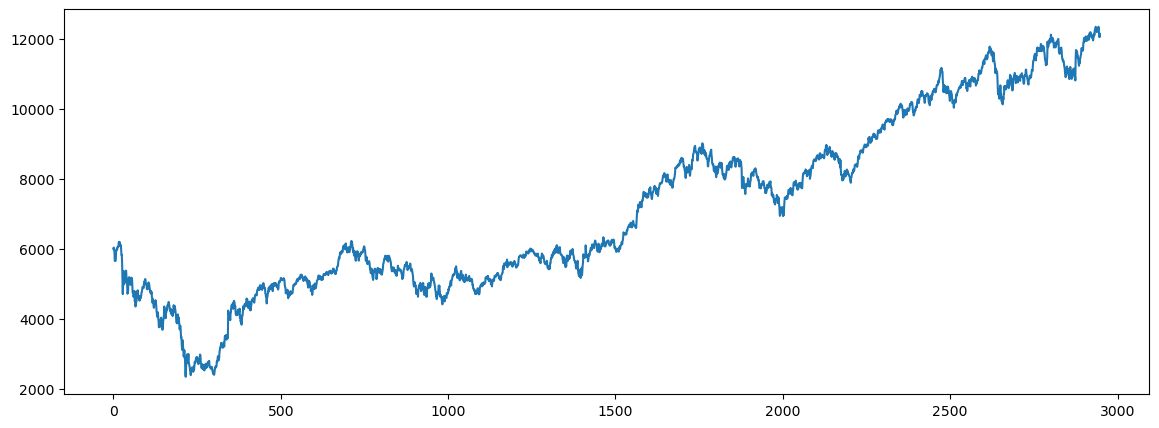

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Download Nifty data from Yahoo Finance
ticker = '^NSEI'  # Nifty 50 index symbol on Yahoo Finance
nifty_data = yf.download(ticker, start='2000-01-01', end='2023-01-01')

# Reset the index to use the date as a column
nifty_data.reset_index(inplace=True)

# Feature selection
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = nifty_data[features]

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training data
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])
        Y.append(dataset[i + time_step, 0:4])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# Split data
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, len(features))))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(4))  # Predicting 4 values: Open, High, Low, Close

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=10)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], 1))), axis=1))[:, :4]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], 1))), axis=1))[:, :4]



In [8]:
test_predict

array([[2.00965207e+08, 2.01135600e+08, 2.02642538e+08, 2.00389552e+08],
       [2.01509744e+08, 2.01646910e+08, 2.03187703e+08, 2.00905519e+08],
       [2.02128166e+08, 2.02240688e+08, 2.03816029e+08, 2.01505156e+08],
       ...,
       [2.80043657e+08, 2.78910226e+08, 2.84388206e+08, 2.78833769e+08],
       [2.80654666e+08, 2.79501469e+08, 2.85044041e+08, 2.79438229e+08],
       [2.80563863e+08, 2.79396539e+08, 2.84947874e+08, 2.79336216e+08]])